## Using Standard deviation

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Create scores that follows normal distribution

In [24]:
def generate_scores(mean=60,std_dev=12,num_samples=200):
	np.random.seed(27)
	scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
	scores = np.round(scores, decimals=0)
	return scores
scores_data = generate_scores()

In [25]:
scores_data = generate_scores()
scores_data

array([75., 56., 67., 65., 63., 59., 58., 63., 70., 75., 67., 65., 53.,
       48., 75., 54., 57., 57., 57., 54., 53., 66., 62., 55., 65., 45.,
       65., 29., 69., 49., 58., 81., 91., 58., 61., 65., 50., 78., 65.,
       63., 72., 46., 73., 61., 60., 70., 42., 67., 82., 72., 74., 69.,
       58., 64., 70., 65., 44., 90., 60., 58., 52., 52., 63., 59., 65.,
       56., 44., 58., 58., 45., 61., 42., 51., 67., 61., 75., 72., 71.,
       58., 67., 60., 69., 62., 64., 52., 58., 75., 35., 43., 63., 62.,
       67., 72., 72., 58., 64., 64., 53., 47., 45., 45., 67., 73., 78.,
       69., 66., 69., 59., 57., 63., 66., 34., 45., 63., 65., 61., 47.,
       68., 53., 70., 73., 70., 38., 78., 62., 83., 60., 67., 61., 57.,
       64., 63., 48., 61., 88., 84., 62., 67., 39., 56., 72., 66., 62.,
       67., 77., 60., 46., 59., 65., 59., 54., 79., 38., 46., 50., 72.,
       61., 47., 65., 29., 71., 59., 65., 46., 56., 67., 62., 64., 57.,
       76., 64., 64., 73., 62., 61., 38., 20., 55., 63., 55., 39

### Creating dataframe

In [26]:
df = pd.DataFrame(scores_data, columns = ['scores'])

### Visualization

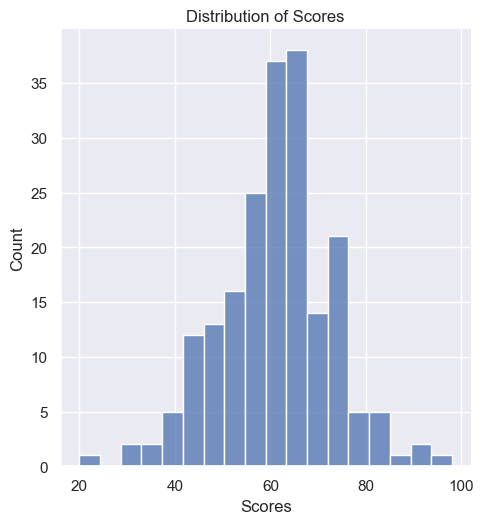

In [43]:
sns.displot(data=scores_data).set(title="Distribution of Scores", xlabel="Scores")
plt.show()

### Mean

In [47]:
mean = df['scores'].mean()
mean

61.005

### Standard deviation

### Standard Deviation Method
If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers.

The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample.

For example, within one standard deviation of the mean will cover 68% of the data.

So, if the mean is 50 and the standard deviation is 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68% of the data sample. We can cover more of the data sample if we expand the range as follows:

1 Standard Deviation from the Mean: 68%
2 Standard Deviations from the Mean: 95%
3 Standard Deviations from the Mean: 99.7%
A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event at approximately 1 in 370 samples.

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

In [48]:
std = df['scores'].std()
std

11.85443432076481

In [49]:
lower_limit = mean - 3 * std
upper_limit = mean + 3 * std

In [50]:
lower_limit

25.441697037705573

In [51]:
upper_limit

96.56830296229444

### values greater than upper limit

In [54]:
upper_outliers = []
for i in df['scores']:
    if i > upper_limit:
        upper_outliers.append(i)
print(upper_outliers)
print(len(upper_outliers))

[98.0]
1


### values lower than upper limit

In [56]:
lower_outliers = []
for i in df['scores']:
    if i < lower_limit:
        lower_outliers.append(i)
print(lower_outliers)
print(len(lower_outliers))

[20.0]
1


### filter the dataframe

In [59]:
df_filtered = df[(df['scores'] > upper_limit) | (df['scores'] < lower_limit)]

In [60]:
df_filtered

,scores
176,20.0
198,98.0


### Dropping these outliers

In [63]:
df.drop(df_filtered.index, inplace = True)

In [64]:
len(df) # earlier the length of dataframe was 200 but now after removing 2 outliers the length has become 198

198

## IQR Method

link 'https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/'

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution.

A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short.

The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot.

Remember that percentiles can be calculated by sorting the observations and selecting values at specific indices. The 50th percentile is the middle value, or the average of the two middle values for an even number of examples. If we had 10,000 samples, then the 50th percentile would be the average of the 5000th and 5001st values.

We refer to the percentiles as quartiles (“quart” meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values.

The IQR defines the middle 50% of the data, or the body of the data.

In [ ]:
## Outlier for prothrombin column
q1 = df['Prothrombin'].quantile(0.25)
q3 = df['Prothrombin'].quantile(0.75)
iqr = q3-q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

new_prothrombin = []
for i in df['Prothrombin']:
    if i > upper_bound:
        new_prothrombin.append(upper_bound)
    elif i < lower_bound:
        new_prothrombin.append(lower_bound)
    else:
        new_prothrombin.append(i)

df['Prothrombin'] = new_prothrombin
sns.boxplot(data = df, x = df['Prothrombin'])

## Local outlier factor method

One-Class Classification, or OCC for short, involves fitting a model on the “normal” data and predicting whether new data is normal or an outlier/anomaly.

link 'https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/'

The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem, and that removing these outliers from the training set will allow a more effective model to be learned.

We can achieve this by defining the LocalOutlierFactor model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1). We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specifics of your dataset.

In [ ]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [ ]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into inpiut and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

## Isolation Forest method of detecting Outlier

In [ ]:
'https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/'

Isolation Forest, or iForest for short, is a tree-based anomaly detection algorithm.

It is based on modeling the normal data in such a way as to isolate anomalies that are both few in number and different in the feature space.

The scikit-learn library provides an implementation of Isolation Forest in the IsolationForest class.

Perhaps the most important hyperparameter in the model is the “contamination” argument, which is used to help estimate the number of outliers in the dataset. This is a value between 0.0 and 0.5 and by default is set to 0.1.

In [ ]:
...
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [ ]:
...
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [ ]:
# evaluate model performance with outliers removed using isolation forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

## Minimum Covariance Determinant
If the input variables have a Gaussian distribution, then simple statistical methods can be used to detect outliers.

For example, if the dataset has two input variables and both are Gaussian, then the feature space forms a multi-dimensional Gaussian and knowledge of this distribution can be used to identify values far from the distribution.

This approach can be generalized by defining a hypersphere (ellipsoid) that covers the normal data, and data that falls outside this shape is considered an outlier. An efficient implementation of this technique for multivariate data is known as the Minimum Covariance Determinant, or MCD for short.

The Minimum Covariance Determinant (MCD) method is a highly robust estimator of multivariate location and scatter, for which a fast algorithm is available. […] It also serves as a convenient and efficient tool for outlier detection.

— Minimum Covariance Determinant and Extensions, 2017.

The scikit-learn library provides access to this method via the EllipticEnvelope class.

It provides the “contamination” argument that defines the expected ratio of outliers to be observed in practice. In this case, we will set it to a value of 0.01, found with a little trial and error.

In [ ]:
...
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)

In [ ]:
# evaluate model performance with outliers removed using elliptical envelope
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

## One-Class SVM
The support vector machine, or SVM, algorithm developed initially for binary classification can be used for one-class classification.

When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers. This modification of SVM is referred to as One-Class SVM.

… an algorithm that computes a binary function that is supposed to capture regions in input space where the probability density lives (its support), that is, a function such that most of the data will live in the region where the function is nonzero.

— Estimating the Support of a High-Dimensional Distribution, 2001.

Although SVM is a classification algorithm and One-Class SVM is also a classification algorithm, it can be used to discover outliers in input data for both regression and classification datasets.

The scikit-learn library provides an implementation of one-class SVM in the OneClassSVM class.

The class provides the “nu” argument that specifies the approximate ratio of outliers in the dataset, which defaults to 0.1. In this case, we will set it to 0.01, found with a little trial and error

In [ ]:
...
# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)

In [ ]:
# evaluate model performance with outliers removed using one class SVM
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(url, header=None)
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

In [ ]:
link = 'https://machinelearningmastery.com/one-class-classification-algorithms/'